In [67]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [164]:
''' Parameter list for all images '''
image_files = [
    {
        'filename': 'Img1.jpg',
        'savename1': 'ece661_pics\hw3_task2_1_result_1.jpg',
        'savename2': 'ece661_pics\hw3_task2_1_result_2.jpg',
        'p': np.asarray([573, 207, 1]),
        'q': np.asarray([966, 342, 1]),
        'r': np.asarray([549, 719, 1]),
        's': np.asarray([1005, 759, 1])
    },
    {
        'filename': 'Img2.jpeg',
        'savename1': 'ece661_pics\hw3_task2_2_result_1.jpg',
        'savename2': 'ece661_pics\hw3_task2_2_result_2.jpg',
        'p': np.asarray([367, 554, 1]),
        'q': np.asarray([662, 510, 1]),
        'r': np.asarray([364, 853, 1]),
        's': np.asarray([642, 973, 1])
    },
    {
        'filename': 'Img3.jpg',
        'savename1': 'ece661_pics\hw3_task2_3_result_1.jpg',
        'savename2': 'ece661_pics\hw3_task2_3_result_2.jpg',
        'p': np.asarray([1011, 349, 1]),
        'q': np.asarray([1304, 359, 1]),
        'r': np.asarray([1023, 728, 1]),
        's': np.asarray([1322, 653, 1])
    },
    {
        'filename': 'Img4.jpg',
        'savename1': 'ece661_pics\hw3_task2_4_result_1.jpg',
        'savename2': 'ece661_pics\hw3_task2_4_result_2.jpg',
        'p': np.asarray([730, 237, 1]),
        'q': np.asarray([1481, 178, 1]),
        'r': np.asarray([800, 977, 1]),
        's': np.asarray([1496, 1008, 1])
    },
    {
        'filename': 'Img5.jpg',
        'savename1': 'ece661_pics\hw3_task2_5_result_1.jpg',
        'savename2': 'ece661_pics\hw3_task2_5_result_2.jpg',
        'p': np.asarray([406, 21, 1]),
        'q': np.asarray([1320, 204, 1]),
        'r': np.asarray([502, 1009, 1]),
        's': np.asarray([1338, 668, 1])
    },
]

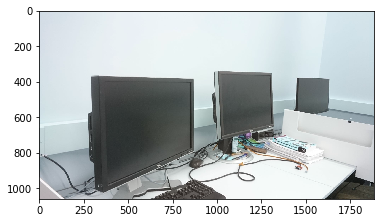

In [193]:
image = image_files[2]
source_img = cv.imread(image['filename'])
plt.imshow(source_img)
w = source_img.shape[1]
h = source_img.shape[0]

In [194]:
''' Find vanishing line and homoghaphy matrix '''
l1 = np.cross(image['p'], image['q'])
l2 = np.cross(image['r'], image['s'])
l3 = np.cross(image['p'], image['r'])
l4 = np.cross(image['q'], image['s'])
l1 = l1 / l1[2]
l2 = l2 / l2[2]
l3 = l3 / l3[2]
l4 = l4 / l4[2]

vp1 = np.cross(l1, l2)
vp2 = np.cross(l3, l4)
vp1 = vp1 / vp1[2]
vp2 = vp2 / vp2[2]

vl = np.cross(vp1, vp2)
vl = vl / vl[2]

H_vl = np.eye(3)
H_vl[2] = vl

H_vl_inv = np.linalg.pinv(H_vl)
H_vl_inv = H_vl_inv / H_vl_inv[2][2]

In [199]:
''' Parameters for creating result canvas '''
img_p = np.asarray([0, 0, 1])
world_p = np.dot(H_vl, img_p)
world_p = world_p / world_p[2]

img_q = np.asarray([w-1, 0, 1])
world_q = np.dot(H_vl, img_q)
world_q = world_q / world_q[2]

img_r = np.asarray([0, h-1, 1])
world_r = np.dot(H_vl, img_r)
world_r = world_r / world_r[2]

img_s = np.asarray([w-1, h-1, 1])
world_s = np.dot(H_vl, img_s)
world_s = world_s / world_s[2]

min_x = int(min(world_p[0], world_q[0], world_r[0], world_s[0]))
max_x = int(max(world_p[0], world_q[0], world_r[0], world_s[0]))
min_y = int(min(world_p[1], world_q[1], world_r[1], world_s[1]))
max_y = int(max(world_p[1], world_q[1], world_r[1], world_s[1]))

scale1 = source_img.shape[0] / (max_y - min_y)
scale2 = source_img.shape[1] / (max_x - min_x)
scale = max(scale1, scale2)

offset_x = int(min_x) 
offset_y = int(min_y) 

size_x = int((max_x - min_x) * scale)
size_y = int((max_y - min_y) * scale)

result_img = np.zeros((size_y, size_x, 3))

True

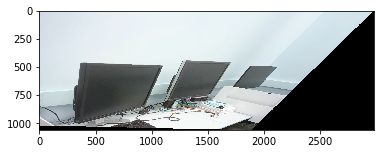

In [200]:
'''Remove projection distortion '''
for i in range(result_img.shape[1]):
    for j in range(result_img.shape[0]):
        point = np.asarray([i/scale + offset_x, j/scale + offset_y, 1])
        result_pts = np.dot(H_vl_inv, point)
        result_x = result_pts[0] / result_pts[2]
        result_y = result_pts[1] / result_pts[2]
        if result_x > 0 and result_y > 0 and result_x < w and result_y < h:
            result_img[j][i] = source_img[int(result_y)][int(result_x)]
plt.imshow(result_img.astype(np.int))
cv.imwrite(image['savename1'], result_img.astype(np.int))

In [201]:
''' Find affine homopgraghy '''
new_p = np.dot(H_vl, image['p'])
new_p = new_p / new_p[2]
new_q = np.dot(H_vl, image['q'])
new_q = new_q / new_q[2]
new_r = np.dot(H_vl, image['r'])
new_r = new_r / new_r[2]
new_s = np.dot(H_vl, image['s'])
new_s = new_s / new_s[2]

new_l1 = np.cross(new_p, new_q)
new_l2 = np.cross(new_r, new_s)
new_l3 = np.cross(new_p, new_r)
new_l4 = np.cross(new_q, new_s)
new_l1 = new_l1 / new_l1[2]
new_l2 = new_l2 / new_l2[2]
new_l3 = new_l3 / new_l3[2]
new_l4 = new_l4 / new_l4[2]

A = np.zeros((2, 2))
b = np.zeros((2, 1))
A[0][0] = new_l1[0] * new_l3[0]
A[0][1] = new_l1[0] * new_l3[1] + new_l1[1] * new_l3[0]
A[1][0] = new_l3[0] * new_l2[0]
A[1][1] = new_l3[0] * new_l2[1] + new_l3[1] * new_l2[0]
b[0] = -1 * new_l1[1] * new_l3[1]
b[1] = -1 * new_l3[1] * new_l2[1]
A_inv = np.linalg.pinv(A)
s = np.dot(A_inv, b)
S = np.ones((2, 2))
S[0][0] = s[0]
S[0][1] = s[1]
S[1][0] = s[1]
u, s, vh = np.linalg.svd(S)
D = np.sqrt(np.diag(s))
H_a = np.zeros((3, 3))
H_a[:2, :2] = np.dot(np.dot(vh, D), vh.T)
H_a[2, 2] = 1
H_a_inv = np.linalg.pinv(H_a)
H_a_inv = H_a_inv / H_a_inv[2][2]

H = np.dot(H_vl, H_a_inv)
H_inv = np.linalg.pinv(H)
H_inv = H_inv / H_inv[2][2]

In [205]:
''' Parameters for creating result canvas '''
img_p = np.asarray([0, 0, 1])
world_p = np.dot(H, img_p)
world_p = world_p / world_p[2]

img_q = np.asarray([w-1, 0, 1])
world_q = np.dot(H, img_q)
world_q = world_q / world_q[2]

img_r = np.asarray([0, h-1, 1])
world_r = np.dot(H, img_r)
world_r = world_r / world_r[2]

img_s = np.asarray([w-1, h-1, 1])
world_s = np.dot(H, img_s)
world_s = world_s / world_s[2]

min_x = int(min(world_p[0], world_q[0], world_r[0], world_s[0]))
max_x = int(max(world_p[0], world_q[0], world_r[0], world_s[0]))
min_y = int(min(world_p[1], world_q[1], world_r[1], world_s[1]))
max_y = int(max(world_p[1], world_q[1], world_r[1], world_s[1]))

scale1 = source_img.shape[0] / (max_y - min_y)
scale2 = source_img.shape[1] / (max_x - min_x)
scale = max(scale1, scale2)

offset_x = int(min_x) 
offset_y = int(min_y) 

size_x = int((max_x - min_x) * scale)
size_y = int((max_y - min_y) * scale)

result_img = np.zeros((size_y, size_x, 3))

True

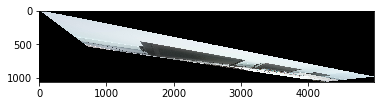

In [206]:
''' Process to get the result '''
for i in range(result_img.shape[1]):
    for j in range(result_img.shape[0]):
        point = np.asarray([i/scale + offset_x, j/scale + offset_y, 1])
        result_pts = np.dot(H_inv, point)
        result_x = result_pts[0] / result_pts[2]
        result_y = result_pts[1] / result_pts[2]
        if result_x > 0 and result_y > 0 and result_x < w and result_y < h:
            result_img[j][i] = source_img[int(result_y)][int(result_x)]

plt.imshow(result_img.astype(np.int))
cv.imwrite(image['savename2'], result_img.astype(np.int))